# Ungraded Lab: Improving Computer Vision Accuracy using Convolutions

Shallow Neural Network
In the previous lessons, you saw how to do fashion recognition using a neural network containing three layers -- the input layer (in the shape of the data), the output layer (in the shape of the desired output) and only one hidden layer. You experimented with the impact of different sizes of hidden layer and number of training epochs on the final accuracy. For convenience, here's the entire code again. Run it and take a note of the test accuracy that is printed out at the end.

In [1]:
# First import all the libraries you will need
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

In [2]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print("\nMODEL TRAINING:")
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print("\nMODEL EVALUATION:")
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f'test set accuracy: {test_accuracy}')
print(f'test set loss: {test_loss}')


MODEL TRAINING:
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7866 - loss: 0.6178
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8613 - loss: 0.3897
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8784 - loss: 0.3361
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8830 - loss: 0.3161
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8930 - loss: 0.2887

MODEL EVALUATION:
test set accuracy: 0.8650000095367432
test set loss: 0.37470170855522156


In [10]:
# Define the model
model = tf.keras.models.Sequential([
                                                         
    # Add convolutions and max pooling
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print("\nMODEL TRAINING:")
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print("\nMODEL EVALUATION:")
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f'test set accuracy: {test_accuracy}')
print(f'test set loss: {test_loss}')

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,786 (952.29 KB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)


MODEL TRAINING:
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 26ms/step - accuracy: 0.7833 - loss: 0.6058
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 26ms/step - accuracy: 0.8872 - loss: 0.3026
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.9074 - loss: 0.2497
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 26ms/step - accuracy: 0.9205 - loss: 0.2141
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9305 - loss: 0.1864

MODEL EVALUATION:
test set accuracy: 0.9082000255584717
test set loss: 0.26249194145202637


In [12]:
print(f"First 100 labels:\n\n{test_labels[:100]}")
print(f"\nShoes: {[i for i in range(100) if test_labels[:100][i]==9]}")

First 100 labels:

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]

Shoes: [0, 23, 28, 39, 68, 83]


C:\Users\shruti sahrawat\anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_4']
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


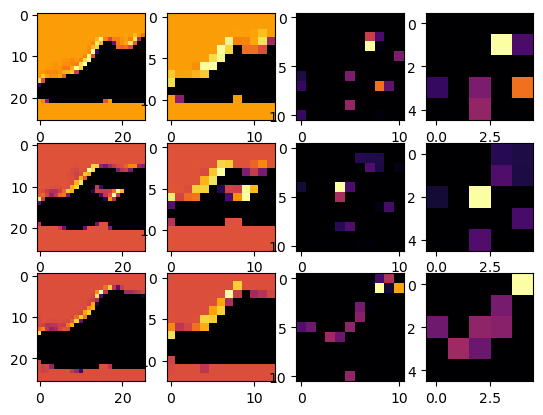

In [14]:
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1
layers_to_visualize = [tf.keras.layers.Conv2D, tf.keras.layers.MaxPooling2D]

layer_outputs = [layer.output for layer in model.layers if type(layer) in layers_to_visualize]
activation_model = tf.keras.models.Model(inputs = model.inputs, outputs=layer_outputs)

f, axarr = plt.subplots(3,len(layer_outputs))

for x in range(len(layer_outputs)):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1), verbose=False)[x]
    axarr[0,x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
  
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1), verbose=False)[x]
    axarr[1,x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
  
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1), verbose=False)[x]
    axarr[2,x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)

EXERCISES

Try editing the convolutions. Change the 64s to either 16 or 32. What impact will this have on accuracy and/or training time?

Remove the final Convolution. What impact will this have on accuracy or training time?

How about adding more Convolutions? What impact do you think this will have? Experiment with it.

Remove all Convolutions but the first. What impact do you think this will have? Experiment with it.

In the 2nd ungraded lab last week, you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here.